# Analyse et nettoyage de données

In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
fatal_encounters_df = pd.read_csv('./dataset/FatalEncounters.csv', low_memory=False)
police_deaths_df = pd.read_csv('./dataset/PoliceDeaths.csv')
tax_policy_center_df = pd.read_excel('./dataset/TaxPolicyCenter.xls') 
washington_post_db1_df = pd.read_csv('./dataset/WashingtonPostDatabase1.csv') 
washington_post_db2_df = pd.read_csv('./dataset/WashingtonPostDatabase2.csv') 

In [4]:
# Unification des deux jeux de données Washington Post
df_wp_combined = pd.concat([washington_post_db1_df, washington_post_db2_df], ignore_index=True)

In [5]:
fatal_encounters_df.head(10)

,Unique ID,Name,Age,Gender,Race,Race with imputations,Imputation probability,URL of image (PLS NO HOTLINKS),Date of injury resulting in death (month/day/year),Location of injury (address),...,URL Temp,Brief description,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intended use of force (Developing),Supporting document link,"Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Unnamed: 32,Unnamed: 33,Unique ID formula,Unique identifier (redundant)
0,31495.0,Ashley McClendon,28,Female,African-American/Black,African-American/Black,Not imputed,https://fatalencounters.org/wp-content/uploads...,12/31/2021,South Pearl Street and Tory Road,...,NaN,"Ashley McClendon's boyfriend, 33-year-old Marc...",Criminal,Pursuit,https://www.wsoctv.com/news/1-person-dead-afte...,No,NaN,NaN,NaN,31495.0
1,31496.0,Name withheld by police,NaN,Female,Race unspecified,NaN,NaN,NaN,12/31/2021,1500 21st Street,...,NaN,Police responded to a man causing a disturbanc...,Pending investigation,Deadly force,https://www.wtok.com/2022/01/01/officer-involv...,No,NaN,NaN,NaN,31496.0
2,31497.0,Name withheld by police,NaN,Male,Race unspecified,NaN,NaN,NaN,12/31/2021,1500 21st Street,...,NaN,Police responded to a man causing a disturbanc...,Pending investigation,Deadly force,https://www.wtok.com/2022/01/01/officer-involv...,No,NaN,NaN,NaN,31497.0
3,31491.0,Johnny C. Martin Jr.,36,Male,Race unspecified,NaN,NaN,NaN,12/30/2021,Martinez Lane,...,NaN,"Johnny C. Martin, Jr. arrived at a gas station...",Suicide,Suicide,https://gbi.georgia.gov/press-releases/2021-12...,No,NaN,NaN,NaN,31491.0
4,31492.0,Dennis McHugh,44,Male,European-American/White,NaN,NaN,NaN,12/30/2021,435 E 4th Street,...,NaN,Deputies responded to a domestic violence call...,Pending investigation,Deadly force,https://kesq.com/news/2021/12/31/officer-invol...,No,NaN,NaN,NaN,31492.0
5,31493.0,Ny'Darius McKinney,21,Male,Race unspecified,NaN,NaN,NaN,12/30/2021,State Rd S-29-296 & Bethel Rd,...,NaN,"About 5:35 p.m., Joseph Jemar Hinson was alleg...",Criminal,Pursuit,https://www.thelancasternews.com/content/21-ye...,No,NaN,NaN,NaN,31493.0
6,31494.0,Timothy Eulis Coleman,50,Male,European-American/White,European-American/White,Not imputed,https://fatalencounters.org/wp-content/uploads...,12/30/2021,Sykes Drive,...,NaN,"Following an argument, witnesses reportedly sa...",Suicide,Suicide,https://wcyb.com/news/local/russell-co-murder-...,No,NaN,NaN,NaN,31494.0
7,31409.0,Name withheld by police,NaN,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,12/29/2021,Carnegie Ave. and Jurupa Ave.,...,NaN,Police responded to a call for a maroon van pa...,Pending investigation,Pursuit,https://www.foxla.com/news/police-pursuit-ends...,No,NaN,NaN,NaN,31409.0
8,31410.0,Name withheld by police,NaN,Female,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,12/29/2021,Carnegie Ave. and Jurupa Ave.,...,NaN,Police responded to a call for a maroon van pa...,Pending investigation,Pursuit,https://www.foxla.com/news/police-pursuit-ends...,No,NaN,NaN,NaN,31410.0
9,31465.0,Christopher Former,49,NaN,African-American/Black,African-American/Black,Not imputed,https://fatalencounters.org/wp-content/uploads...,12/29/2021,1521 Bonita Bluff Ct,...,NaN,Police received a 911 call around 7 p.m. from ...,Suicide,Suicide,https://www.wtsp.com/article/news/local/hillsb...,Yes,NaN,NaN,NaN,31465.0


In [6]:
fatal_encounters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31498 entries, 0 to 31497
Data columns (total 36 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Unique ID                                                        31497 non-null  float64
 1   Name                                                             31498 non-null  object 
 2   Age                                                              30277 non-null  object 
 3   Gender                                                           31354 non-null  object 
 4   Race                                                             31497 non-null  object 
 5   Race with imputations                                            30630 non-null  object 
 6   Imputation probability                                           30614 non-null  object 
 7   URL of image (PLS NO HOTLINKS)          

In [7]:
fatal_encounters_df.isnull().sum()
# on laisse tomber :  URL of image (PLS NO HOTLINKS), Full Address, Latitude, Longitude, UID Temporary, Name Temporary, Description Temp, URL Temp, Brief description, Supporting document link, Unnamed: 32, Unnamed: 33, Unique ID formula, Unique identifier (redundant) 

Unique ID                                                              1
Name                                                                   0
Age                                                                 1221
Gender                                                               144
Race                                                                   1
Race with imputations                                                868
Imputation probability                                               884
URL of image (PLS NO HOTLINKS)                                     16773
 Date of injury resulting in death (month/day/year)                    0
Location of injury (address)                                         557
Location of death (city)                                              36
State                                                                  1
Location of death (zip code)                                         182
Location of death (county)                         

In [8]:
# Supprimer les colonnes avec de grandes quantités de données manquantes
fatal_encounters_df.drop(['URL of image (PLS NO HOTLINKS)', 'UID Temporary', 'Name Temporary', 'Description Temp', 
                          'URL Temp', 'Unnamed: 32', 'Unnamed: 33', 'Unique ID formula'], axis=1, inplace=True)

# Imputer les valeurs manquantes pour 'Age' avec la médiane
fatal_encounters_df['Age'] = pd.to_numeric(fatal_encounters_df['Age'], errors='coerce')
fatal_encounters_df['Age'].fillna(fatal_encounters_df['Age'].median(), inplace=True)

# Imputer les valeurs manquantes pour les colonnes catégorielles par le mode
for column in ['Gender', 'Race', 'Race with imputations']:
    mode_value = fatal_encounters_df[column].mode()[0]
    fatal_encounters_df[column].fillna(mode_value, inplace=True)

# Vérifier le nouveau statut des valeurs manquantes
print(fatal_encounters_df.isnull().sum())

Unique ID                                                              1
Name                                                                   0
Age                                                                    0
Gender                                                                 0
Race                                                                   0
Race with imputations                                                  0
Imputation probability                                               884
 Date of injury resulting in death (month/day/year)                    0
Location of injury (address)                                         557
Location of death (city)                                              36
State                                                                  1
Location of death (zip code)                                         182
Location of death (county)                                            15
Full Address                                       

C:\Users\anasa\AppData\Local\Temp\ipykernel_3328\3807290633.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fatal_encounters_df['Age'].fillna(fatal_encounters_df['Age'].median(), inplace=True)
C:\Users\anasa\AppData\Local\Temp\ipykernel_3328\3807290633.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [9]:
# Nettoyage du dataset police_deaths_df
police_deaths_df.head(10)

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC
5,High Sheriff John Caldwell Cook,"Mecklenburg County Sheriff's Office, NC","EOW: Tuesday, October 16, 1804",Cause of Death: Gunfire,Gunfire,1804-10-16,1804,False,Mecklenburg County Sheriff's Office,NC
6,Watchman Christian Luswanger,"New York City Watch, NY","EOW: Thursday, December 25, 1806",Cause of Death: Stabbed,Stabbed,1806-12-25,1806,False,New York City Watch,NY
7,Deputy Sheriff John A. Gooch,"Livingston County Sheriff's Department, KY","EOW: Saturday, March 7, 1807",Cause of Death: Gunfire,Gunfire,1807-03-07,1807,False,Livingston County Sheriff's Department,KY
8,Deputy Sheriff Ebenezer Parker,"Cumberland County Sheriff's Office, ME","EOW: Monday, January 18, 1808",Cause of Death: Assault,Assault,1808-01-18,1808,False,Cumberland County Sheriff's Office,ME
9,Night Watchman George Workner,"Baltimore City Police Department, MD","EOW: Tuesday, March 15, 1808",Cause of Death: Stabbed,Stabbed,1808-03-15,1808,False,Baltimore City Police Department,MD


In [10]:
police_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   person       22800 non-null  object
 1   dept         22800 non-null  object
 2   eow          22800 non-null  object
 3   cause        22800 non-null  object
 4   cause_short  22800 non-null  object
 5   date         22800 non-null  object
 6   year         22800 non-null  int64 
 7   canine       22800 non-null  bool  
 8   dept_name    22800 non-null  object
 9   state        22800 non-null  object
dtypes: bool(1), int64(1), object(8)
memory usage: 1.6+ MB


In [11]:
police_deaths_df.describe()

,year
count,22800.000000
mean,1951.751272
std,38.233234
min,1791.000000
25%,1924.000000
50%,1952.000000
75%,1983.000000
max,2016.000000


In [12]:
police_deaths_df.isnull().sum()

person         0
dept           0
eow            0
cause          0
cause_short    0
date           0
year           0
canine         0
dept_name      0
state          0
dtype: int64

In [13]:
# Drop les colonnes redondantes dept_name et eow
cleaned_police_deaths_df = police_deaths_df.drop(['dept_name', 'eow'], axis=1)

In [14]:
# Conversion de la colonne 'date' en datetime
police_deaths_df['date'] = pd.to_datetime(police_deaths_df['date'], format='%Y-%m-%d')
# Vérifiez le nouveau type de la colonne pour confirmer la conversion
police_deaths_df['date'].dtype

dtype('<M8[ns]')

In [15]:
cleaned_police_deaths_df.head(10)

,person,dept,cause,cause_short,date,year,canine,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,SC
5,High Sheriff John Caldwell Cook,"Mecklenburg County Sheriff's Office, NC",Cause of Death: Gunfire,Gunfire,1804-10-16,1804,False,NC
6,Watchman Christian Luswanger,"New York City Watch, NY",Cause of Death: Stabbed,Stabbed,1806-12-25,1806,False,NY
7,Deputy Sheriff John A. Gooch,"Livingston County Sheriff's Department, KY",Cause of Death: Gunfire,Gunfire,1807-03-07,1807,False,KY
8,Deputy Sheriff Ebenezer Parker,"Cumberland County Sheriff's Office, ME",Cause of Death: Assault,Assault,1808-01-18,1808,False,ME
9,Night Watchman George Workner,"Baltimore City Police Department, MD",Cause of Death: Stabbed,Stabbed,1808-03-15,1808,False,MD


In [16]:
# donner des valeurs aux valeurs nulles -> valeurs par défaut

# remove null ligne for 'Unique ID'
cleaned_fatal_encounters_df = fatal_encounters_df.dropna(subset={'Unique ID'})

# Remplacement des valeurs nulles par "N/A" dans tout le DataFrame
cleaned_fatal_encounters_df.fillna("N/A", inplace=True)

cleaned_fatal_encounters_df.isnull().sum()

C:\Users\anasa\AppData\Local\Temp\ipykernel_3328\4146724697.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cleaned_fatal_encounters_df.fillna("N/A", inplace=True)
C:\Users\anasa\AppData\Local\Temp\ipykernel_3328\4146724697.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_fatal_encounters_df.fillna("N/A", inplace=True)


Unique ID                                                          0
Name                                                               0
Age                                                                0
Gender                                                             0
Race                                                               0
Race with imputations                                              0
Imputation probability                                             0
 Date of injury resulting in death (month/day/year)                0
Location of injury (address)                                       0
Location of death (city)                                           0
State                                                              0
Location of death (zip code)                                       0
Location of death (county)                                         0
Full Address                                                       0
Latitude                          

In [17]:
tax_policy_center_df.head(20)

,2023-07-10 00:00:00,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State and Local General Expenditures as a Perc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exhibit:
4,NaN,NaN,NaN,NaN,Elementary,NaN,NaN,NaN,NaN,NaN,NaN,Personal
5,Region and State,NaN,Inter-,NaN,and Secondary,Higher,Public,Health and,NaN,NaN,All,Income [1]
6,NaN,Total,governmental,Total,Education,Education,Welfare,Hospitals,Highways,Police,Other,(Millions)
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,United States,0.173081,0.000162,0.17292,0.03551,0.014629,0.040503,0.017716,0.009697,0.00634,0.048524,21288708
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
tax_policy_center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   2023-07-10 00:00:00  65 non-null     object
 1   Unnamed: 1           61 non-null     object
 2   Unnamed: 2           62 non-null     object
 3   Unnamed: 3           62 non-null     object
 4   Unnamed: 4           63 non-null     object
 5   Unnamed: 5           62 non-null     object
 6   Unnamed: 6           62 non-null     object
 7   Unnamed: 7           62 non-null     object
 8   Unnamed: 8           61 non-null     object
 9   Unnamed: 9           61 non-null     object
 10  Unnamed: 10          62 non-null     object
 11  Unnamed: 11          64 non-null     object
dtypes: object(12)
memory usage: 7.8+ KB


In [19]:
tax_policy_center_df.describe()

,2023-07-10 00:00:00,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,65,61,62,62,63,62,62,62,61,61,62,64
unique,65,61,34,62,63,62,62,62,61,61,62,64
top,State and Local General Expenditures as a Perc...,Total,0,Direct,Elementary,Higher,Public,Health and,Highways,Police,All,Exhibit:
freq,1,1,29,1,1,1,1,1,1,1,1,1


In [20]:
tax_policy_center_df.isnull().sum()

2023-07-10 00:00:00    17
Unnamed: 1             21
Unnamed: 2             20
Unnamed: 3             20
Unnamed: 4             19
Unnamed: 5             20
Unnamed: 6             20
Unnamed: 7             20
Unnamed: 8             21
Unnamed: 9             21
Unnamed: 10            20
Unnamed: 11            18
dtype: int64

In [21]:
# Renommer les colonnes
column_names = [
    'Region_or_State', 'Total_Expenditures', 'Intergovernmental_Expenditures', 
    'Direct_Expenditures', 'Elementary_and_Secondary_Education', 'Higher_Education', 
    'Public_Welfare', 'Hospitals', 'Highways', 'Police', 'Other_Expenditures', 
    'Personal_Income_Millions'
]
tax_policy_center_df.columns = column_names

# Supprimer les Lignes Inutiles
tax_policy_center_df = tax_policy_center_df.dropna(how='all')  # Supprime les lignes où toutes les cellules sont NaN
tax_policy_center_df = tax_policy_center_df[~tax_policy_center_df['Region_or_State'].str.contains("Expenditures as a Perc", na=False)]

# Gestion des Valeurs Manquantes
for col in ['Total_Expenditures', 'Intergovernmental_Expenditures', 'Direct_Expenditures', 'Elementary_and_Secondary_Education', 'Higher_Education', 'Public_Welfare', 'Hospitals', 'Highways', 'Police', 'Other_Expenditures', 'Personal_Income_Millions']:
    tax_policy_center_df[col] = pd.to_numeric(tax_policy_center_df[col], errors='coerce')
    tax_policy_center_df[col].fillna(tax_policy_center_df[col].median(), inplace=True)

# Conversion des Types de Données :
tax_policy_center_df['Personal_Income_Millions'] = pd.to_numeric(tax_policy_center_df['Personal_Income_Millions'], errors='coerce')

# Verification Finale
tax_policy_center_df.info()
print(tax_policy_center_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 3 to 81
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region_or_State                     64 non-null     object 
 1   Total_Expenditures                  67 non-null     float64
 2   Intergovernmental_Expenditures      67 non-null     float64
 3   Direct_Expenditures                 67 non-null     float64
 4   Elementary_and_Secondary_Education  67 non-null     float64
 5   Higher_Education                    67 non-null     float64
 6   Public_Welfare                      67 non-null     float64
 7   Hospitals                           67 non-null     float64
 8   Highways                            67 non-null     float64
 9   Police                              67 non-null     float64
 10  Other_Expenditures                  67 non-null     float64
 11  Personal_Income_Millions            67 non-null     

C:\Users\anasa\AppData\Local\Temp\ipykernel_3328\2408420696.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tax_policy_center_df[col].fillna(tax_policy_center_df[col].median(), inplace=True)
C:\Users\anasa\AppData\Local\Temp\ipykernel_3328\2408420696.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [22]:
washington_post_db1_df.head(15)

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473
5,11,2015-01-04,attack,not,gun,Guthrie,Logan,OK,35.876991,-97.423454,not_available,Kenneth Joe Brown,18.0,male,W,not_available,False,False,101
6,13,2015-01-05,shoot,car,gun,Chandler,Maricopa,AZ,33.327887,-111.840959,not_available,Kenneth Arnold Buck,22.0,male,H,not_available,False,False,195
7,15,2015-01-06,point,not,gun,Assaria,Saline,KS,38.703755,-97.563904,not_available,Brock Nichols,35.0,male,W,not_available,False,False,490
8,16,2015-01-06,accident,not,unarmed,Burlington,Des Moines,IA,40.809250,-91.118875,not_available,Autumn Steele,34.0,female,W,not_available,False,True,287
9,17,2015-01-06,point,not,replica,Knoxville,Allegheny,PA,40.412936,-79.991408,not_available,Leslie Sapp III,47.0,male,B,not_available,False,False,26254


In [23]:
washington_post_db1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9473 entries, 0 to 9472
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9473 non-null   int64  
 1   date                        9473 non-null   object 
 2   threat_type                 9406 non-null   object 
 3   flee_status                 8181 non-null   object 
 4   armed_with                  9260 non-null   object 
 5   city                        9403 non-null   object 
 6   county                      4751 non-null   object 
 7   state                       9473 non-null   object 
 8   latitude                    8428 non-null   float64
 9   longitude                   8428 non-null   float64
 10  location_precision          8428 non-null   object 
 11  name                        9121 non-null   object 
 12  age                         9083 non-null   float64
 13  gender                      9444 

In [24]:
washington_post_db1_df.describe()

,id,latitude,longitude,age
count,9473.000000,8428.000000,8.428000e+03,9083.000000
mean,5206.243112,36.644025,-1.068720e+12,37.416382
std,2947.396134,5.340643,9.811296e+13,12.938045
min,3.000000,19.497503,-9.007175e+15,2.000000
25%,2651.000000,33.462523,-1.119957e+02,28.000000
50%,5237.000000,36.078188,-9.434420e+01,35.000000
75%,7768.000000,40.034817,-8.317548e+01,45.000000
max,10253.000000,71.301255,-6.786717e+01,92.000000


In [25]:
# Convertir les dates
washington_post_db1_df['date'] = pd.to_datetime(washington_post_db1_df['date'])

# Nettoyer les espaces et corriger les erreurs typographiques
washington_post_db1_df['city'] = washington_post_db1_df['city'].str.strip().replace('incorrect_name', 'correct_name')

# Gérer les valeurs manquantes
washington_post_db1_df['latitude'].fillna(method='ffill', inplace=True)  # exemple avec forward fill
washington_post_db1_df['longitude'].fillna(method='ffill', inplace=True)

# Supprimer les doublons
washington_post_db1_df = washington_post_db1_df.drop_duplicates()

# Corriger les anomalies dans longitude et latitude si nécessaire
# Supposons que toutes les valeurs doivent être dans un certain intervalle
washington_post_db1_df = washington_post_db1_df[(washington_post_db1_df['longitude'] > -180) & (washington_post_db1_df['longitude'] < 180)]

# Vérifier les valeurs aberrantes pour 'age'
washington_post_db1_df = washington_post_db1_df[(washington_post_db1_df['age'] > 0) & (washington_post_db1_df['age'] < 100)]

# Imprimer le résumé pour vérifier les changements
print(washington_post_db1_df.describe())
print(washington_post_db1_df.info())

                 id                           date     latitude    longitude  \
count   9082.000000                           9082  9082.000000  9082.000000   
mean    5140.655693  2019-09-03 18:27:30.561550336    36.728437   -96.986734   
min        3.000000            2015-01-02 00:00:00    19.497503  -160.006944   
25%     2566.250000            2017-04-30 00:00:00    33.494774  -111.962955   
50%     5159.500000            2019-10-01 00:00:00    36.140053   -94.419785   
75%     7704.750000            2022-01-22 18:00:00    40.141305   -83.206891   
max    10253.000000            2024-03-18 00:00:00    71.301255   -67.867166   
std     2952.552054                            NaN     5.349618    16.409862   

               age  
count  9082.000000  
mean     37.417860  
min       2.000000  
25%      28.000000  
50%      35.000000  
75%      45.000000  
max      92.000000  
std      12.937991  
<class 'pandas.core.frame.DataFrame'>
Index: 9082 entries, 0 to 9472
Data columns (total 1

C:\Users\anasa\AppData\Local\Temp\ipykernel_3328\973531561.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  washington_post_db1_df['latitude'].fillna(method='ffill', inplace=True)  # exemple avec forward fill
C:\Users\anasa\AppData\Local\Temp\ipykernel_3328\973531561.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  washington_post_db1_df['latitude'].fillna(method='ffill', inplace=True)  # exemple avec forward fill
C:\Users\anasa\AppD

In [26]:
washington_post_db2_df.head(20)

,id,name,type,state,oricodes,total_shootings
0,3145,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1
1,2576,Aberdeen Police Department,local_police,WA,WA01401,1
2,2114,Abilene Police Department,local_police,TX,TX22101,4
3,2088,Abington Township Police Department,local_police,PA,PA04601,1
4,3187,Acadia Parish Sheriff's Office,sheriff,LA,LA00100,1
5,3375,Acworth Police Department,local_police,GA,GA03305,1
6,1241,Ada County Sheriff's Office,sheriff,ID,ID00100,5
7,1615,Adair County Sheriff's Office,sheriff,OK,OK00100,1
8,1978,Adams County Sheriff's Department,sheriff,CO,CO00100,14
9,897,Adams County Sheriff's Department,sheriff,ID,ID00200,1


In [27]:
washington_post_db2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3516 entries, 0 to 3515
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               3516 non-null   int64 
 1   name             3516 non-null   object
 2   type             3516 non-null   object
 3   state            3516 non-null   object
 4   oricodes         3391 non-null   object
 5   total_shootings  3516 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 164.9+ KB


In [28]:
washington_post_db2_df.describe()

,id,total_shootings
count,3516.000000,3516.000000
mean,3658.141069,2.909272
std,5480.087054,6.357085
min,1.000000,1.000000
25%,1258.750000,1.000000
50%,2198.500000,1.000000
75%,3153.250000,2.000000
max,28851.000000,134.000000


In [29]:
# Normalisation des textes
washington_post_db2_df['name'] = washington_post_db2_df['name'].str.strip().str.title()
washington_post_db2_df['type'] = washington_post_db2_df['type'].str.strip().str.lower()

# Traitement des Doublons
washington_post_db2_df = washington_post_db2_df.drop_duplicates(subset=['oricodes'])

# Exemple d'imputation par la valeur la plus fréquente
most_common_oricode = washington_post_db2_df['oricodes'].mode()[0]
washington_post_db2_df['oricodes'].fillna(most_common_oricode, inplace=True)

# Validation finale
print(washington_post_db2_df.describe())
print(washington_post_db2_df.info())

                 id  total_shootings
count   3357.000000      3357.000000
mean    3511.130474         2.969318
std     5204.969788         6.488824
min        1.000000         1.000000
25%     1241.000000         1.000000
50%     2168.000000         1.000000
75%     3113.000000         2.000000
max    28851.000000       134.000000
<class 'pandas.core.frame.DataFrame'>
Index: 3357 entries, 0 to 3515
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               3357 non-null   int64 
 1   name             3357 non-null   object
 2   type             3357 non-null   object
 3   state            3357 non-null   object
 4   oricodes         3357 non-null   object
 5   total_shootings  3357 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 183.6+ KB
None


C:\Users\anasa\AppData\Local\Temp\ipykernel_3328\3130837498.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  washington_post_db2_df['oricodes'].fillna(most_common_oricode, inplace=True)


In [30]:
# Analyse exploratoire de données et statistiques descriptives
# Répartition des décès par âge, race, genre (Fatal Encounters)
age_dist_fatal_encounters = cleaned_fatal_encounters_df['Age'].describe()
race_dist_fatal_encounters = cleaned_fatal_encounters_df['Race'].value_counts()
gender_dist_fatal_encounters = cleaned_fatal_encounters_df['Gender'].value_counts()

In [31]:
age_dist_fatal_encounters

count    31497.000000
mean        35.191681
std         13.563609
min          0.080000
25%         25.000000
50%         33.000000
75%         43.000000
max        107.000000
Name: Age, dtype: float64

In [32]:
race_dist_fatal_encounters

Race
European-American/White                                      10614
Race unspecified                                              8779
African-American/Black                                        7008
Hispanic/Latino                                               4192
Asian/Pacific Islander                                         485
Native American/Alaskan                                        323
Middle Eastern                                                  53
European-American/European-American/White                       37
African-American/Black African-American/Black Not imputed        4
Christopher Anthony Alexander                                    1
european-American/White                                          1
Name: count, dtype: int64

In [33]:
gender_dist_fatal_encounters

Gender
Male           28443
Female          3031
Transgender       23
Name: count, dtype: int64

In [34]:
# Nettoyage des données de FatalEncounters
# Conversion de la date en type datetime et gestion des valeurs manquantes
cleaned_fatal_encounters_df[' Date of injury resulting in death (month/day/year)'] = pd.to_datetime(cleaned_fatal_encounters_df[' Date of injury resulting in death (month/day/year)'].str.strip(), errors='coerce')

C:\Users\anasa\AppData\Local\Temp\ipykernel_3328\1880395954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_fatal_encounters_df[' Date of injury resulting in death (month/day/year)'] = pd.to_datetime(cleaned_fatal_encounters_df[' Date of injury resulting in death (month/day/year)'].str.strip(), errors='coerce')


In [35]:
# Conversion de l'âge en numérique et gestion des valeurs manquantes
cleaned_fatal_encounters_df['Age'] = pd.to_numeric(cleaned_fatal_encounters_df['Age'], errors='coerce')

C:\Users\anasa\AppData\Local\Temp\ipykernel_3328\1912929299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_fatal_encounters_df['Age'] = pd.to_numeric(cleaned_fatal_encounters_df['Age'], errors='coerce')


In [36]:
# Traitement des autres colonnes si nécessaire
# Exemple : Convertir le genre et la race en catégories
cleaned_fatal_encounters_df['Gender'] = cleaned_fatal_encounters_df['Gender'].astype('category')
cleaned_fatal_encounters_df['Race'] = cleaned_fatal_encounters_df['Race'].astype('category')

C:\Users\anasa\AppData\Local\Temp\ipykernel_3328\2728852569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_fatal_encounters_df['Gender'] = cleaned_fatal_encounters_df['Gender'].astype('category')
C:\Users\anasa\AppData\Local\Temp\ipykernel_3328\2728852569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_fatal_encounters_df['Race'] = cleaned_fatal_encounters_df['Race'].astype('category')


# Création de visualisations

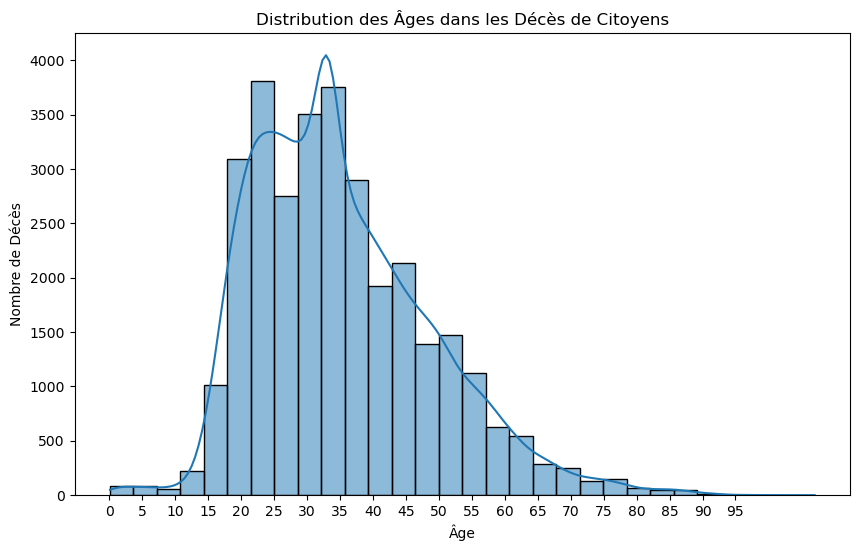

In [37]:
# Création de l'histogramme (il suffit juste de prendre les valeurs âge du dataset fatal_encounters étant donné que tous les cas sont des décès)
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_fatal_encounters_df['Age'], kde=True, bins=30) # Modification de la quantité de bins pour une meilleure clarté
plt.title('Distribution des Âges dans les Décès de Citoyens')
plt.xlabel('Âge')
plt.ylabel('Nombre de Décès')
plt.xticks(range(0, 100, 5)) # Réglage des ticks pour améliorer la lisibilité
plt.show()

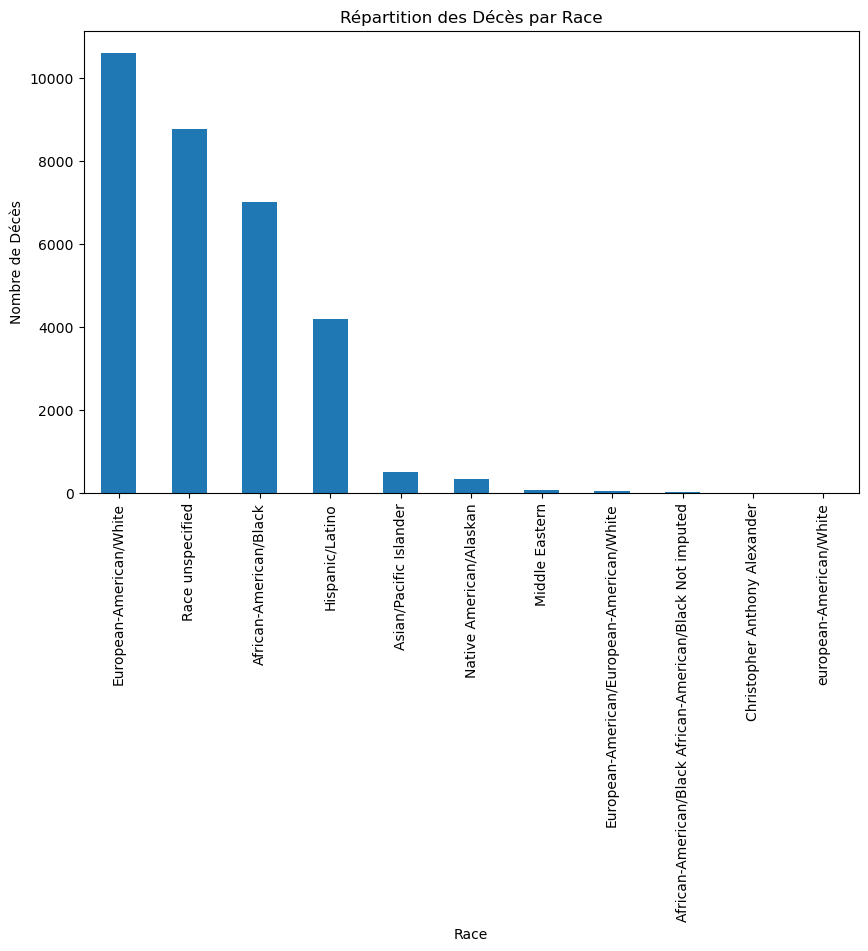

In [38]:
# Répartition des décès par race
plt.figure(figsize=(10, 6))
race_dist_fatal_encounters.plot(kind='bar')
plt.title('Répartition des Décès par Race')
plt.xlabel('Race')
plt.ylabel('Nombre de Décès')
plt.show()

In [39]:
# Analyse des données sur les décès de policiers
cause_death_police = cleaned_police_deaths_df['cause_short'].value_counts()
cause_death_police

cause_short
Gunfire                     12067
Automobile accident          2348
Motorcycle accident          1134
Heart attack                  977
Vehicular assault             888
Struck by vehicle             868
Vehicle pursuit               627
Assault                       613
Gunfire (Accidental)          604
Stabbed                       465
Aircraft accident             381
Drowned                       262
Struck by train               254
Fall                          197
Duty related illness          169
9/11 related illness          110
Terrorist attack               85
Electrocuted                   83
Animal related                 82
Accidental                     80
Struck by streetcar            68
Fire                           63
Heat exhaustion                61
Explosion                      58
Bomb                           57
Exposure to toxins             44
Weather/Natural disaster       33
Training accident              28
Structure collapse             23
Tr

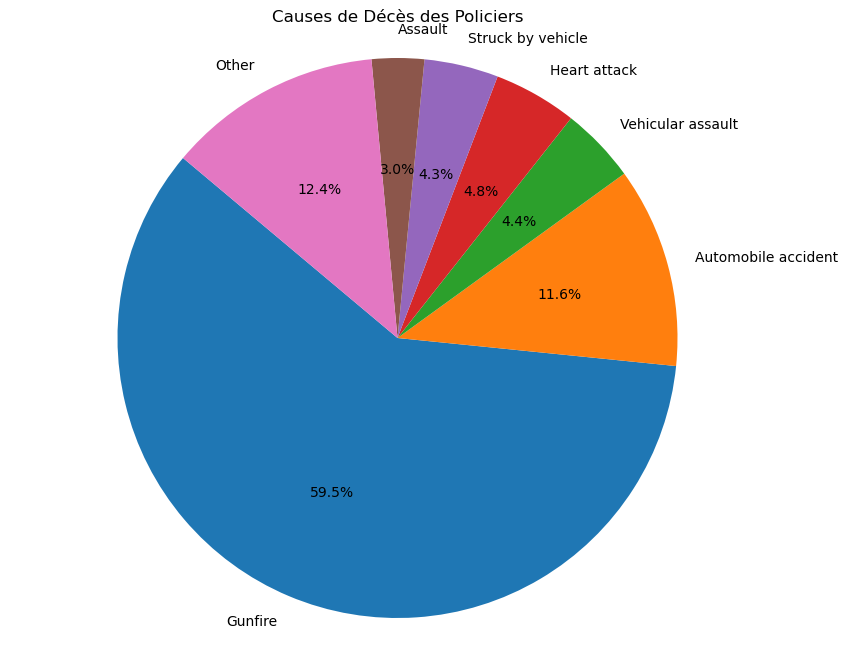

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulation d'un DataFrame pour les besoins de l'exemple
data = {
    'cause_short': ['Gunfire', 'Automobile accident', 'Motorcycle accident', 'Heart attack', 'Vehicular assault',
                    'Struck by vehicle', 'Assault', 'Gunfire (Accidental)', 'Stabbed', 'Other']
}
data['count'] = [12067, 2348, 1134, 977, 888, 868, 613, 604, 465, 312]  # Ajouté des valeurs fictives pour 'Other'
cleaned_police_deaths_df = pd.DataFrame(data).set_index('cause_short')

# Comptage des décès par cause
cause_death_police = cleaned_police_deaths_df['count']

# Données de test pour la visualisation
selected_causes = ['Gunfire', 'Automobile accident', 'Vehicular assault', 'Heart attack', 'Struck by vehicle', 'Assault']
cause_death_police_dict = {cause: cause_death_police[cause] for cause in selected_causes}
cause_death_police_dict['Other'] = cause_death_police.drop(selected_causes).sum()

# Création d'un diagramme circulaire
plt.figure(figsize=(10, 8))
plt.pie(cause_death_police_dict.values(), labels=cause_death_police_dict.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Causes de Décès des Policiers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [41]:
cleaned_fatal_encounters_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31497 entries, 0 to 31496
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Unique ID                                                        31497 non-null  float64       
 1   Name                                                             31497 non-null  object        
 2   Age                                                              31497 non-null  float64       
 3   Gender                                                           31497 non-null  category      
 4   Race                                                             31497 non-null  category      
 5   Race with imputations                                            31497 non-null  object        
 6   Imputation probability                                           31497 non-null  ob

C:\Users\anasa\AppData\Local\Temp\ipykernel_3328\253460406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_fatal_encounters_df['Year'] = cleaned_fatal_encounters_df[' Date of injury resulting in death (month/day/year)'].dt.year


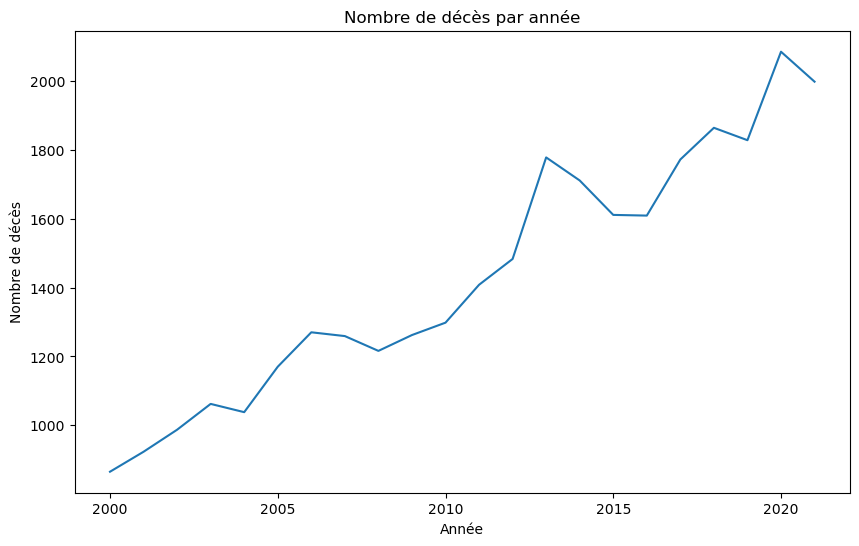

In [42]:
# Analyse et visualisation des données
# Exemple : Analyse des tendances temporelles dans les décès de citoyens
cleaned_fatal_encounters_df['Year'] = cleaned_fatal_encounters_df[' Date of injury resulting in death (month/day/year)'].dt.year
yearly_deaths = cleaned_fatal_encounters_df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_deaths)
plt.title('Nombre de décès par année')
plt.xlabel('Année')
plt.ylabel('Nombre de décès')
plt.show()

In [43]:
cleaned_police_deaths_df

,count
cause_short,
Gunfire,12067
Automobile accident,2348
Motorcycle accident,1134
Heart attack,977
Vehicular assault,888
Struck by vehicle,868
Assault,613
Gunfire (Accidental),604
Stabbed,465


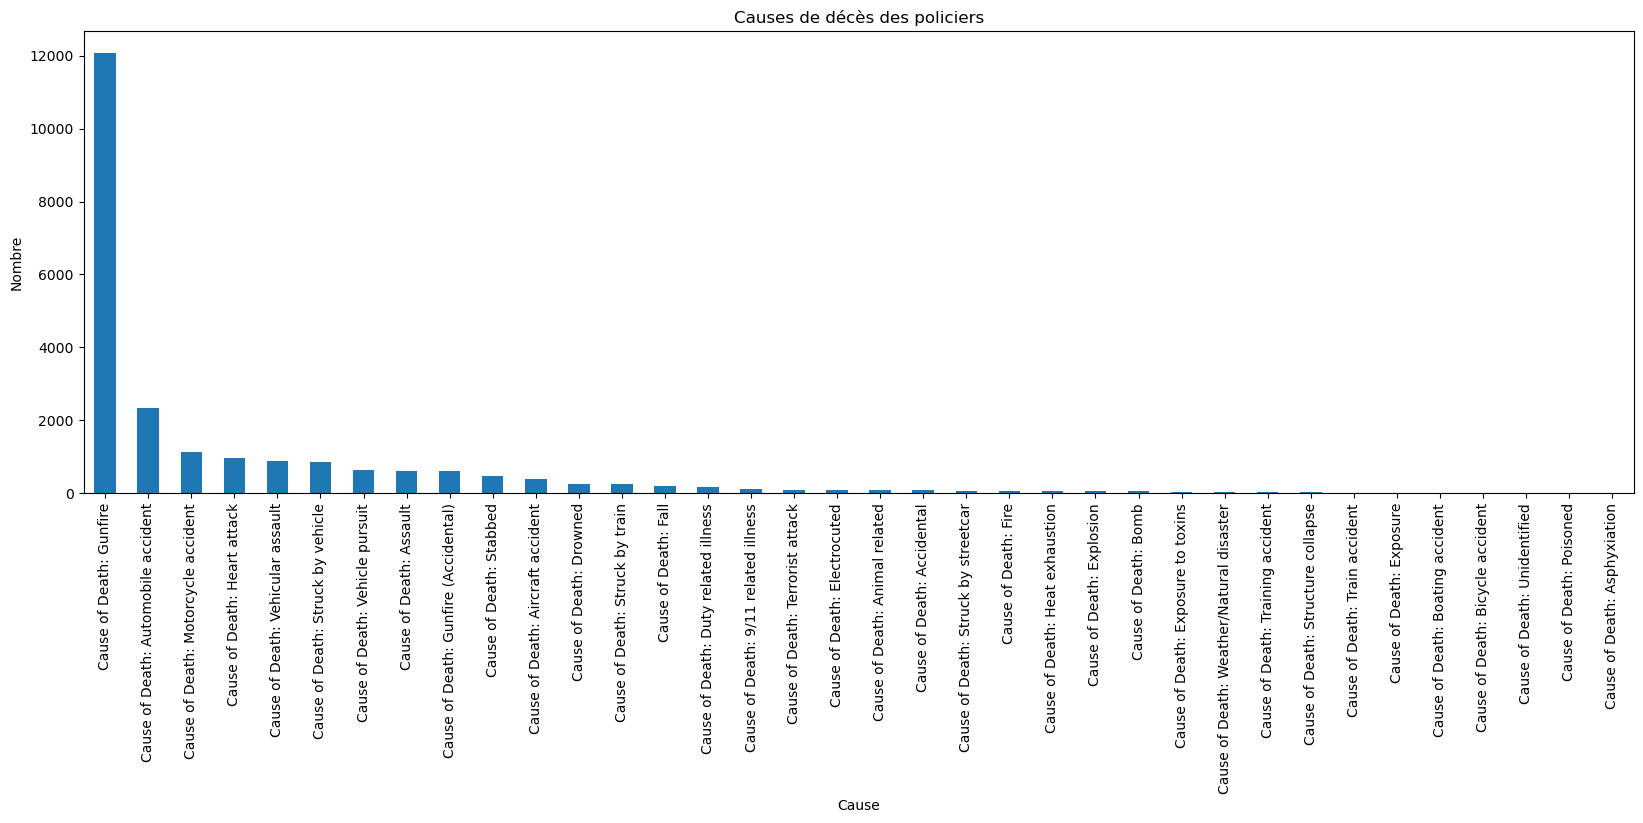

In [44]:
# Exemple : Comparaison des causes de décès chez les policiers et les citoyens
# Pour les policiers (df_police_deaths)
police_death_causes = police_deaths_df['cause'].value_counts()
plt.figure(figsize=(20, 6))
police_death_causes.plot(kind='bar')
plt.title('Causes de décès des policiers')
plt.xlabel('Cause')
plt.ylabel('Nombre')
plt.show()

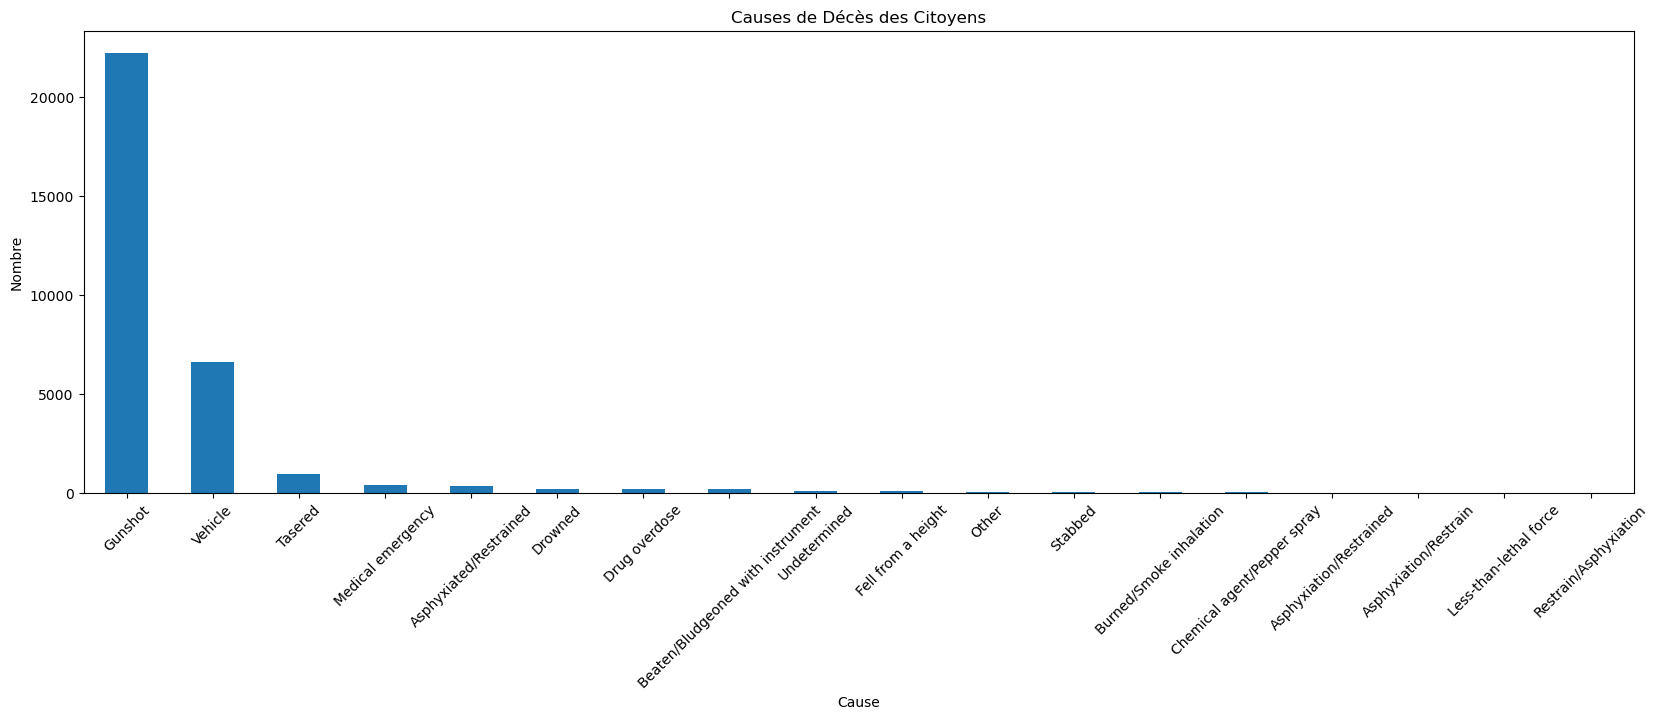

In [45]:
# Visualisation des causes de décès des citoyens
# Assumant que la colonne 'Highest level of force' représente la cause du décès
citizen_death_causes = fatal_encounters_df['Highest level of force'].value_counts()
plt.figure(figsize=(20, 6))
citizen_death_causes.plot(kind='bar')
plt.title('Causes de Décès des Citoyens')
plt.xlabel('Cause')
plt.ylabel('Nombre')
plt.xticks(rotation=45)  # Pour améliorer la lisibilité des étiquettes
plt.show()

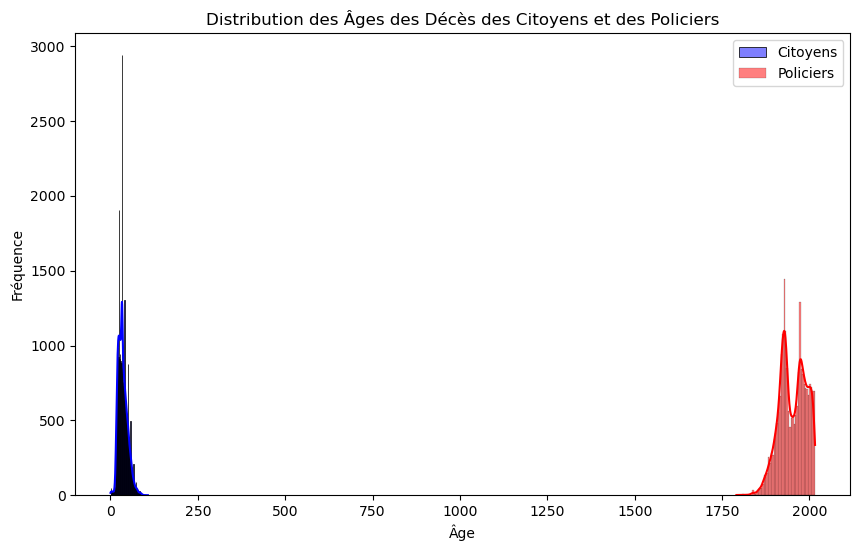

In [46]:
# Comparaison des profils démographiques des policiers et citoyens décédés
# Exemple : Comparaison des âges
plt.figure(figsize=(10, 6))
sns.histplot(fatal_encounters_df['Age'].dropna(), kde=True, color='blue', label='Citoyens')
sns.histplot(police_deaths_df['year'], kde=True, color='red', label='Policiers')
plt.title('Distribution des Âges des Décès des Citoyens et des Policiers')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

# Statistiques

### Éventuels tests statistiques (à déterminer selon les questions spécifiques de recherche)
### Résultats et interprétations
### Les résultats des analyses permettent d'aborder les problématiques posées, comme l'impact de la localisation, les profils des individus concernés, et les modalités des incidents.

In [47]:
fatal_encounters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31498 entries, 0 to 31497
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Unique ID                                                        31497 non-null  float64
 1   Name                                                             31498 non-null  object 
 2   Age                                                              31498 non-null  float64
 3   Gender                                                           31498 non-null  object 
 4   Race                                                             31498 non-null  object 
 5   Race with imputations                                            31498 non-null  object 
 6   Imputation probability                                           30614 non-null  object 
 7    Date of injury resulting in death (mont

In [48]:
# 1. Tests t de Student
# Comparons, par exemple, l'âge moyen des victimes dans deux États différents. 
# Supposons que nous choisissons la Californie et le Texas pour cette comparaison.
# Extraction des données pour la Californie et le Texas
ages_california = fatal_encounters_df[fatal_encounters_df['State'] == 'CA']['Age'].dropna()
ages_texas = fatal_encounters_df[fatal_encounters_df['State'] == 'TX']['Age'].dropna()

# Effectuer le test t
t_stat, p_value = stats.ttest_ind(ages_california, ages_texas)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -2.295836926732006, P-value: 0.02171172814448655


In [49]:
# 2. Tests du Chi-Deux
# Examinons s'il existe une indépendance entre le genre et le fait d'être armé ou non lors des interactions fatales.
# Tableau de contingence entre le genre et le statut d'armement
contingency_table = pd.crosstab(fatal_encounters_df['Gender'], fatal_encounters_df['Armed/Unarmed'])

# Test du Chi-Deux
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi2 Stat: {chi2_stat}, P-value: {p_value}")

Chi2 Stat: 1135.399433065242, P-value: 1.3277965715761005e-233


In [50]:
# 3. ANOVA
# Pour l'ANOVA, nous pouvons comparer l'âge moyen des victimes dans différents niveaux de force utilisés (par exemple, 'Gunshot', 'Vehicle', etc.).
# Préparation des données pour ANOVA
grouped_data = fatal_encounters_df.groupby('Highest level of force')['Age'].apply(list)

# ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 26.437849393235602, P-value: 3.5836732861942855e-84


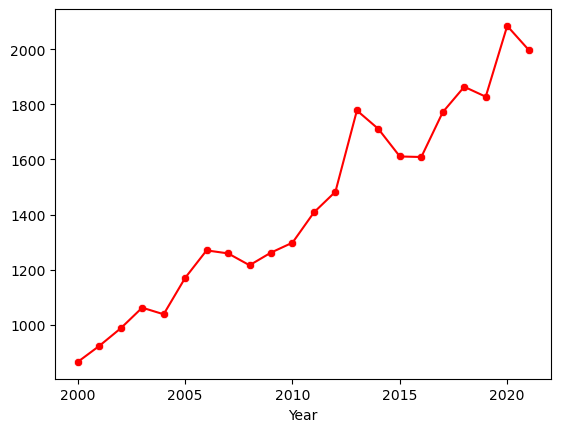

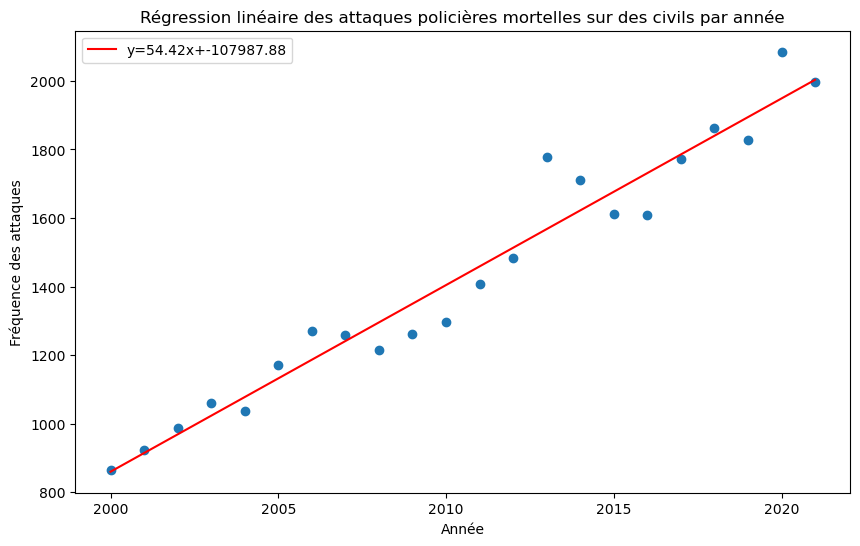

Prédiction des attaques policières meurtrières pour 2050: 3581.43
Le coefficient de corrélation Pearson pour les attaques policières est : 0.98


In [54]:
#4. Test de Pearson
# Prévision pour 2050

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, linregress


# Vos données x et y semblent correctes
x = yearly_deaths.index.astype(np.float64)  
y = yearly_deaths.values

# # Nuage de points et line plot
sns.scatterplot(x=x, y=y, color='red')
sns.lineplot(x=x, y=y, color='red')
plt.show()

# Corrélation et régression
corr, _ = pearsonr(x, y)
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Préparation de la ligne de régression
line_x = np.array(x)  # Convertit x en un tableau NumPy pour le calcul
line_y = slope * line_x + intercept

# Afficher la droite de régression et le nuage de points
plt.figure(figsize=(10, 6))
plt.plot(line_x, line_y, 'r', label=f'y={slope:.2f}x+{intercept:.2f}')  # Régression linéaire
plt.scatter(x, y)  # Nuage de points
plt.legend()
plt.xlabel('Année')
plt.ylabel('Fréquence des attaques')
plt.title('Régression linéaire des attaques policières mortelles sur des civils par année')
plt.show()

# Prédiction pour 2050
prediction_2050 = slope * 2050 + intercept
print(f"Prédiction des attaques policières meurtrières pour 2050: {prediction_2050:.2f}")
print(f"Le coefficient de corrélation Pearson pour les attaques policières est : {corr:.2f}")

### Interprétation du coefficient de corrélation de Pearson
### Un coefficient de corrélation de Pearson de 0.98 indique une très forte corrélation positive entre deux variables. Ce résultat suggère que, lorsque l'une des variables augmente, l'autre a tendance à augmenter également, et vice versa. Dans le contexte de vos projets de développement, si vous utilisez ce coefficient pour analyser des données, cela pourrait signifier que deux variables que vous étudiez sont étroitement liées.
### Cependant, il est important de se rappeler que la corrélation n'implique pas la causalité. Un coefficient de corrélation élevé ne signifie pas que l'une des variables est la cause de l'autre. Il est également important de considérer le contexte des données et d'autres analyses statistiques pour tirer des conclusions précises.

In [51]:
# 1. Corrélation entre l'âge des victimes et le niveau de force utilisé
# Nous pouvons utiliser une analyse de corrélation pour voir s'il existe une relation entre l'âge des victimes et le niveau de force utilisé lors des incidents.
# Nous devons d'abord convertir les catégories de 'Highest level of force' en valeurs numériques
force_mapping = {category: idx for idx, category in enumerate(fatal_encounters_df['Highest level of force'].unique())}
fatal_encounters_df['Force Level Num'] = fatal_encounters_df['Highest level of force'].map(force_mapping)

# Calcul de la corrélation
correlation_age_force = fatal_encounters_df[['Age', 'Force Level Num']].corr()
print(correlation_age_force)

                      Age  Force Level Num
Age              1.000000         0.025005
Force Level Num  0.025005         1.000000


In [52]:
# 3. Corrélation entre la race des victimes et le fait d'être armé
# Nous pouvons également examiner la relation entre la race des victimes et le fait d'être armé au moment de l'incident.
# Conversion des données catégorielles en valeurs numériques pour la corrélation
race_mapping = {race: idx for idx, race in enumerate(fatal_encounters_df['Race'].unique())}
fatal_encounters_df['Race Num'] = fatal_encounters_df['Race'].map(race_mapping)
armed_mapping = {'Armed': 1, 'Unarmed': 0} # Exemple simple pour deux catégories
fatal_encounters_df['Armed Num'] = fatal_encounters_df['Armed/Unarmed'].map(armed_mapping)

# Calcul de la corrélation
correlation_race_armed = fatal_encounters_df[['Race Num', 'Armed Num']].corr()
print(correlation_race_armed)

           Race Num  Armed Num
Race Num    1.00000    0.05035
Armed Num   0.05035    1.00000


### Conclusion globale que l'on peut tirer :

### L'analyse des interactions fatales entre citoyens et policiers aux États-Unis révèle plusieurs tendances et caractéristiques clés. Premièrement, il existe des différences notables dans le nombre de décès par année, par État, et en fonction de divers facteurs démographiques tels que la race et le sexe. Les données montrent que certaines années et certains États présentent des taux plus élevés de rencontres fatales, indiquant des variations géographiques et temporelles significatives.

### Les tendances temporelles indiquent une évolution fluctuante du nombre de décès au fil des ans, ce qui pourrait refléter des changements dans les politiques de sécurité publique, les pratiques d'application de la loi ou des facteurs sociaux. Il est également important de noter les disparités raciales et de genre parmi les victimes, ce qui soulève des questions sur les biais potentiels et les inégalités dans les interactions avec les forces de l'ordre.

### De plus, la comparaison entre les dépenses de l'État en matière de sécurité publique et les taux de décès pourrait indiquer une relation entre les ressources allouées à la sécurité et l'incidence des décès. Cependant, cette relation nécessite une analyse plus approfondie pour comprendre pleinement les dynamiques en jeu et pour identifier les facteurs causaux.

### En conclusion, bien que cette analyse fournisse un aperçu précieux des interactions fatales entre citoyens et policiers aux États-Unis, elle souligne également la nécessité de recherches supplémentaires et d'une analyse plus nuancée pour mieux comprendre les causes sous-jacentes et développer des stratégies pour réduire ces incidents tragiques.